In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset ibm/flowers', target_size=(64,64), class_mode='categorical', batch_size=24)


Found 4317 images belonging to 5 classes.


In [6]:
xtest = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset ibm/flowers', target_size=(64,64), class_mode='categorical', batch_size=24)


Found 4317 images belonging to 5 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense


In [8]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Dense layers
model.add(Dense(300,activation='relu')) # Hidden layer
model.add(Dense(150,activation='relu')) # Hidden layer
model.add(Dense(5,activation='softmax')) # Output layer

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [11]:
model.save('flowers.h5')


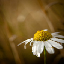

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/dataset ibm/flowers/daisy/10437754174_22ec990b77_m.jpg',target_size=(64,64))
img

In [13]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
model.predict(x)

1/1 [==============================] - 0s 122ms/step


array([[2.7258190e-16, 1.0000000e+00, 0.0000000e+00, 1.2480947e-16,
        3.2657982e-26]], dtype=float32)

In [14]:
xtrain.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [15]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 22ms/step


'dandelion'

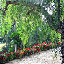

In [16]:
from numpy.lib.type_check import imag
img = image.load_img('/content/drive/MyDrive/dataset ibm/flowers/rose/11102341464_508d558dfc_n.jpg',target_size=(64,64))
img

In [17]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 22ms/step


'sunflower'

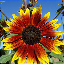

In [18]:
img = image.load_img('/content/drive/MyDrive/dataset ibm/flowers/sunflower/10386503264_e05387e1f7_m.jpg',target_size=(64,64))
img

In [19]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 32ms/step


'tulip'

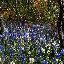

In [20]:
img = image.load_img('/content/drive/MyDrive/dataset ibm/flowers/tulip/10094729603_eeca3f2cb6.jpg',target_size=(64,64))
img

In [21]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 28ms/step


'tulip'

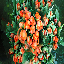

In [22]:
img = image.load_img('/content/drive/MyDrive/dataset ibm/flowers/tulip/11614202956_1dcf1c96a1.jpg',target_size=(64,64))
img
